# Proyek Akhir:Menyelesaikan Permasalahan Institusi Pendidikan

# Persiapan

### Menyiapkan library yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.src.metrics.metrics_utils import confusion_matrix

from utils import *
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import  train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier

### Menyiapkan data yang akan digunakan

In [3]:
# fetch dataset
data = fetch_ucirepo(id=697)
data_feature = pd.DataFrame(data.data.features)
data_target = pd.DataFrame(data.data.targets)

# data_feature and data_target is merged become data frame
df = pd.concat([data_feature, data_target], axis=1)

In [4]:
df

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Data understanding

## Information data

#### Insight
| Column name | Description |
| --- | --- |
|Marital status | The marital status of the student. (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated |
| Application mode | The method of application used by the student. (Categorical) 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)|
|Application order | The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice) |
|Course | The course taken by the student. (Categorical) 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)|
|Daytime/evening attendance | Whether the student attends classes during the day or in the evening. (Categorical) 1 – daytime 0 - evening |
|Previous qualification| The qualification obtained by the student before enrolling in higher education. (Categorical) 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle) |
|Previous qualification (grade) | Grade of previous qualification (between 0 and 200) |
| Nacionality | The nationality of the student. (Categorical) 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian|
|Mother's qualification | The qualification of the student's mother. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)|
|Father's qualification | The qualification of the student's father. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle) |
| Mother's occupation | The occupation of the student's mother. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants |
| Father's occupation | The occupation of the student's father. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers |
| Admission grade | Admission grade (between 0 and 200) |
| Displaced | Whether the student is a displaced person. (Categorical) 	1 – yes 0 – no |
| Educational special needs | Whether the student has any special educational needs. (Categorical) 1 – yes 0 – no |
|Debtor | Whether the student is a debtor. (Categorical) 1 – yes 0 – no|
|Tuition fees up to date | Whether the student's tuition fees are up to date. (Categorical) 1 – yes 0 – no|
|Gender | The gender of the student. (Categorical) 1 – male 0 – female |
|Scholarship holder | Whether the student is a scholarship holder. (Categorical) 1 – yes 0 – no |
|Age at enrollment | The age of the student at the time of enrollment. (Numerical)|
|International | Whether the student is an international student. (Categorical) 1 – yes 0 – no|
|Curricular units 1st sem (credited) | The number of curricular units credited by the student in the first semester. (Numerical) |
| Curricular units 1st sem (enrolled) | The number of curricular units enrolled by the student in the first semester. (Numerical) |
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical) |
| Curricular units 1st sem (approved) | The number of curricular units approved by the student in the first semester. (Numerical) |

In [8]:
df["Application mode"].value_counts()

Application mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64

## Assesing Data

### Check basic information data

In [4]:
df.describe()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

#### Insight
in addition to target, all of features have numeric type data and target has object type data

### Check missing value

In [6]:
df.isnull().sum()

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

#### Insight
Values showed aren't have missing value

### Check data

/var/folders/dw/vp6jrdxx0k9cnkpqssvxcxhh0000gn/T/ipykernel_62646/3166001733.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


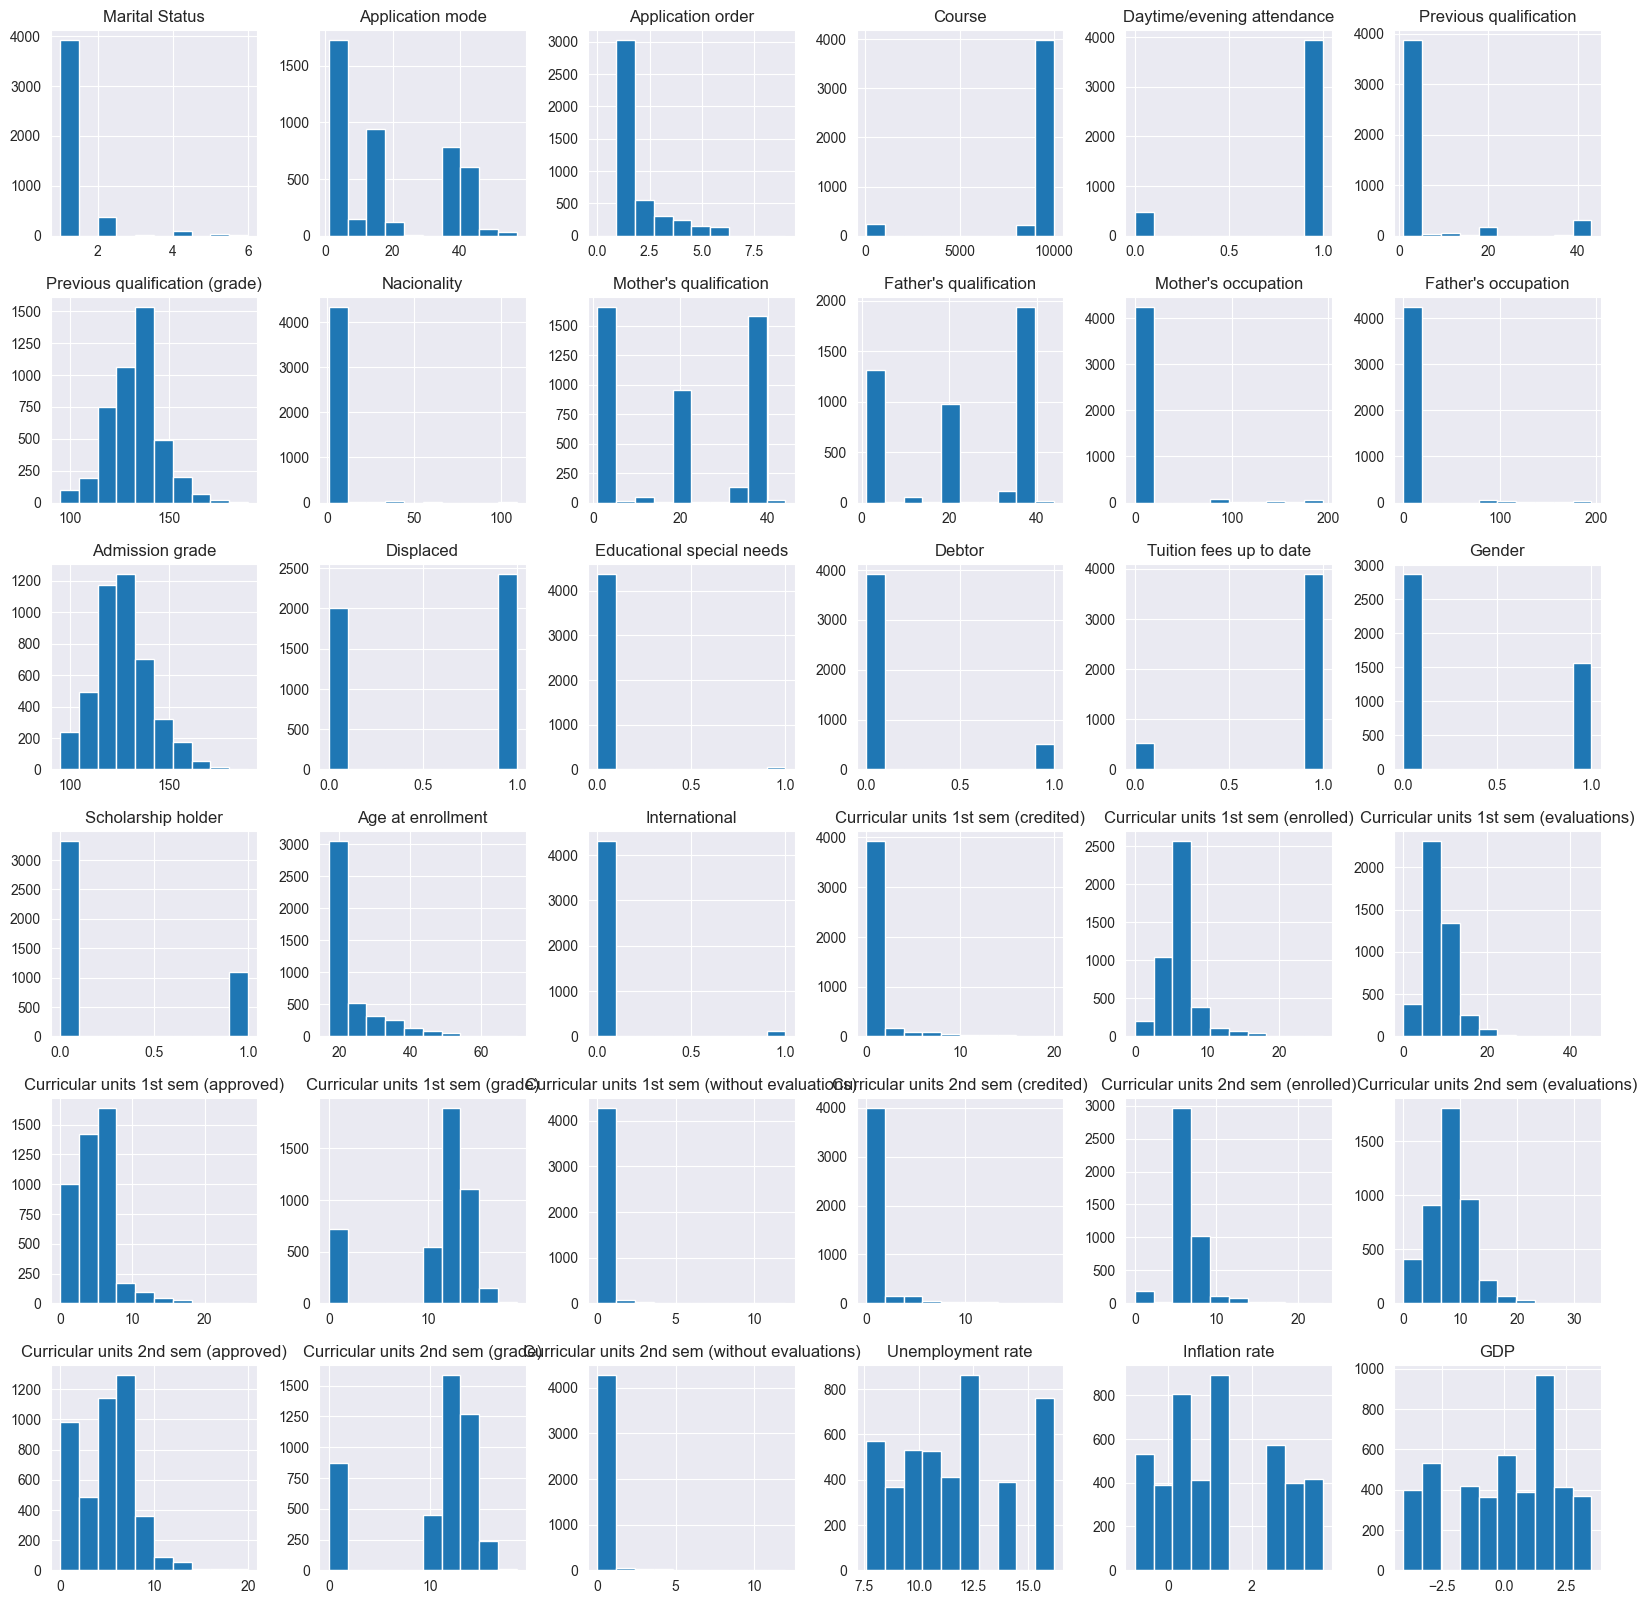

In [7]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

#### Insight
the data show good quality, so that it doesn't need cleaning data

## Cleaning Data

#### Insight
the data show good quality, so that it doesn't need cleaning data


# Data Exploratory

1. Bagaimana distribusi dari variabel target? Berapa persen mahasiswa yang dropout, enrolled, dan graduate?
2. Apakah ada perbedaan signifikan dalam distribusi target berdasarkan gender?
3. Apakah usia saat pendaftaran (age at enrollment) memengaruhi kemungkinan mahasiswa untuk lulus (graduate)?
4. Apakah status pernikahan (marital status) memengaruhi hasil akhir mahasiswa?
5. Apakah mahasiswa scholarship holder cenderung lebih banyak yang lulus dibandingkan yang tidak?
6. Bagaimana distribusi target berdasarkan admission grade? Apakah nilai yang lebih tinggi berkorelasi dengan kelulusan (graduate)?
7. Apakah waktu kehadiran kuliah (daytime/evening attendance) berkaitan dengan kemungkinan mahasiswa lulus?
8. Apakah jumlah curricular units (credited/enrolled/evaluated/approved) memengaruhi hasil akhir mahasiswa?
9. Apakah course tertentu memiliki tingkat dropout lebih tinggi dibandingkan yang lain?
10. Bagaimana hubungan antara international student dengan hasil akhir mahasiswa?


### 1. Bagaimana distribusi dari variabel target? Berapa persen mahasiswa yang dropout, enrolled, dan graduate?


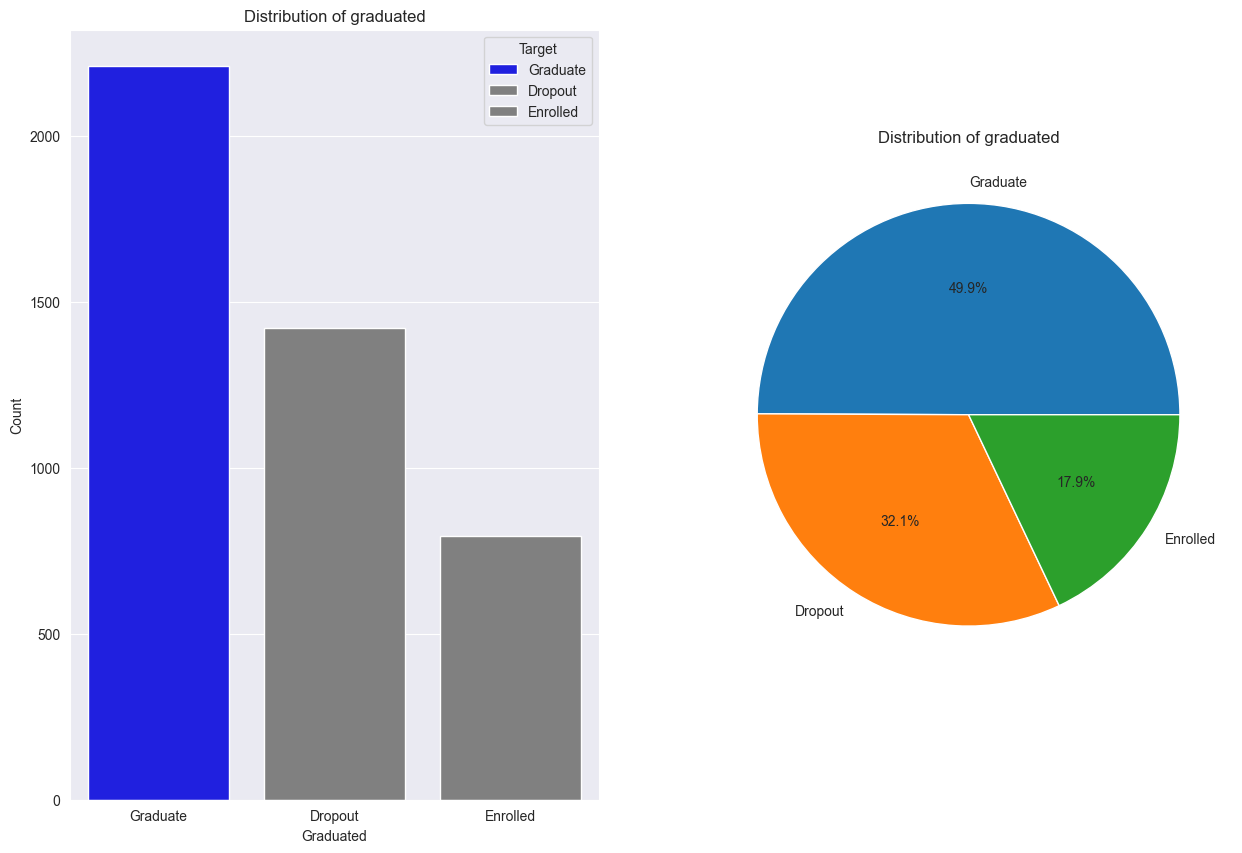

In [8]:
distribution_graduated = df["Target"].value_counts()

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15, 10))
sns.barplot(x=distribution_graduated.index,
            y=distribution_graduated.values,
            palette=["blue", "gray", "gray"],
            hue=distribution_graduated.index,
            legend=True,
            ax=ax1)
ax1.set_xlabel("Graduated")
ax1.set_ylabel("Count")
ax1.set_title("Distribution of graduated")

ax2.pie(distribution_graduated, labels=distribution_graduated.index, autopct='%1.1f%%')
ax2.set_title("Distribution of graduated")
plt.show()


#### Insight
Data graduate show that student graduated is the most highest than dropout and enrolled

### 2. Apakah ada perbedaan signifikan dalam distribusi target berdasarkan gender?

Text(0.5, 1.0, 'Distribution of gender')

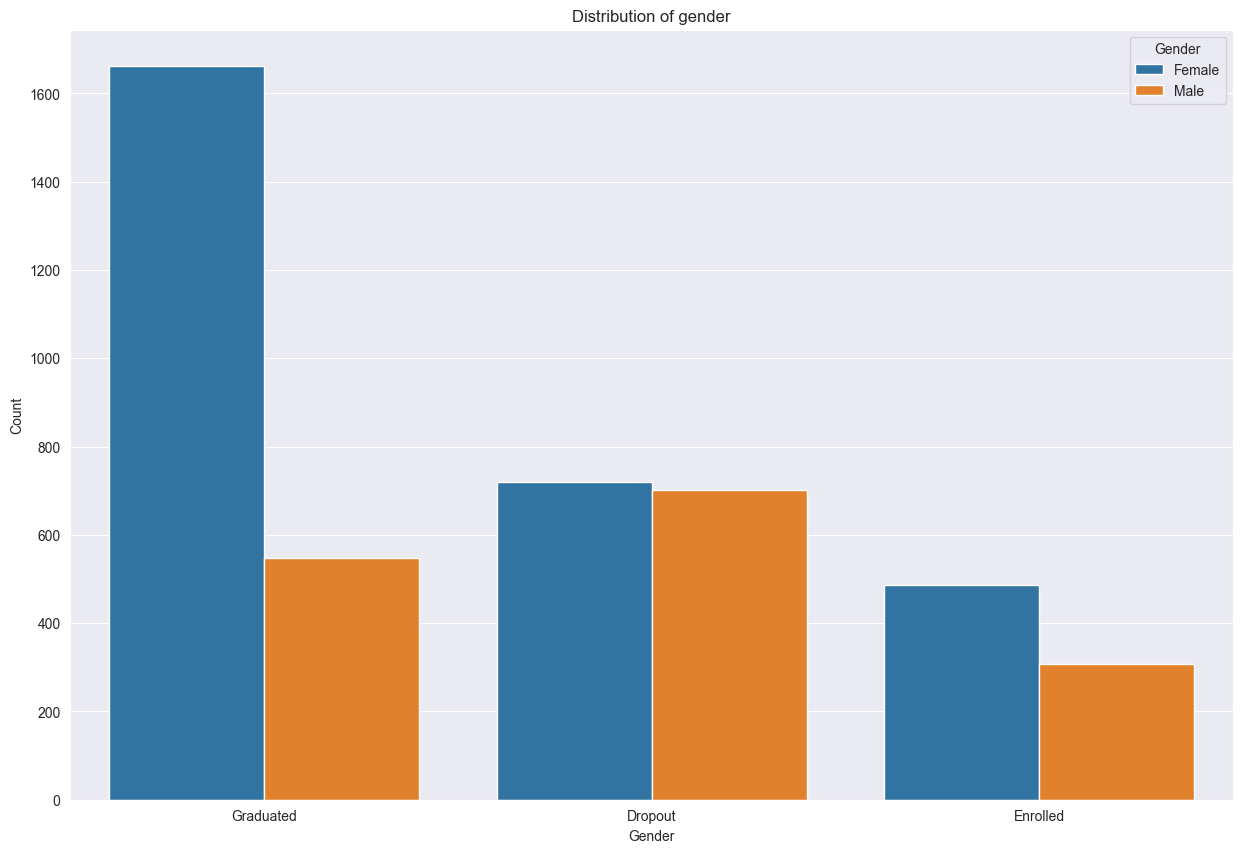

In [9]:
data_gender = group_by(df, column="Gender")
df_distribution_gender = melt(data_gender, column="Gender")

df_distribution_gender.replace({
        "Target_graduated": "Graduated",
        "Target_dropout": "Dropout",
        "Target_enrolled": "Enrolled",
    },
    inplace=True,)

df_distribution_gender.replace({"Gender": {1: "Male", 0: "Female"}}, inplace=True)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))
sns.barplot(x="Target",
            y="Count",
            data=df_distribution_gender,
            hue="Gender",
            legend=True,
            ax=ax)
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.set_title("Distribution of gender")


#### Insight
Data shows that female is more graduated that male and data dropout shows female and male almost the same

### 3. Apakah usia saat pendaftaran (age at enrollment) memengaruhi kemungkinan mahasiswa untuk lulus (graduate)?

In [10]:
def range_age(age):
    try:
        if 17 >= age:
            return "under 18"
        elif 18 >= age <= 24:
            return "18-24"
        elif 25 >= age <= 34:
            return "25-34"
        elif 35 >= age <= 44:
            return "35-44"
        elif 45 >= age <= 54:
            return "45-54"
        elif 55 >= age <= 64:
            return "55-64"
        elif 65 >= age <= 75:
            return "65-74"
    except:
        raise ValueError("Invalid age")

<Axes: xlabel='Age group', ylabel='Count'>

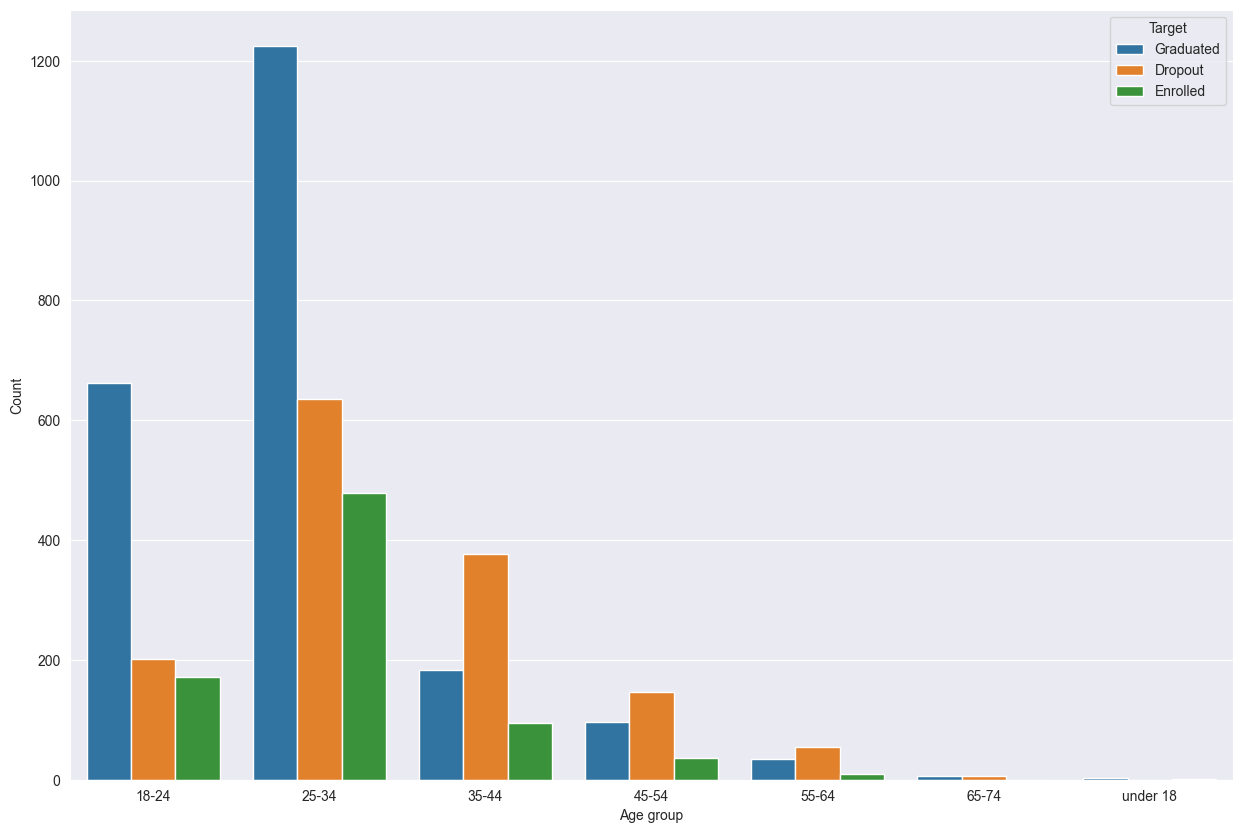

In [11]:
df["Age group"] = df["Age at enrollment"].apply(range_age)
data_age = group_by(df, column="Age group")
df_distribution_age = melt(data_age, column="Age group")
df_distribution_age.replace({
    "Target_graduated": "Graduated",
    "Target_dropout": "Dropout",
    "Target_enrolled": "Enrolled",
}, inplace=True)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))
sns.barplot(x="Age group",
            y="Count",
            data=df_distribution_age,
            hue="Target",
            legend=True,
            ax=ax)

#### insight
From this distribution graph, it can be seen that age at enrollment has an influence on the possibility of students graduating. The 25–34 age group dominates the number of graduates, which shows that this age is a productive phase for completing formal education. However, in the younger age group, 18–24, there is a significant proportion of those who are still enrolled and also those who have dropped out. This indicates that younger age is often associated with incomplete early stages of education or with challenges that may lead to dropout. On the other hand, after age 35, the number of graduates drops sharply, which may reflect additional challenges, such as work and family responsibilities, that impact graduation chances. Therefore, age at enrollment clearly plays an important role in determining a student's likelihood of completing their education.

### 4. Apakah status pernikahan (marital status) memengaruhi hasil akhir mahasiswa?

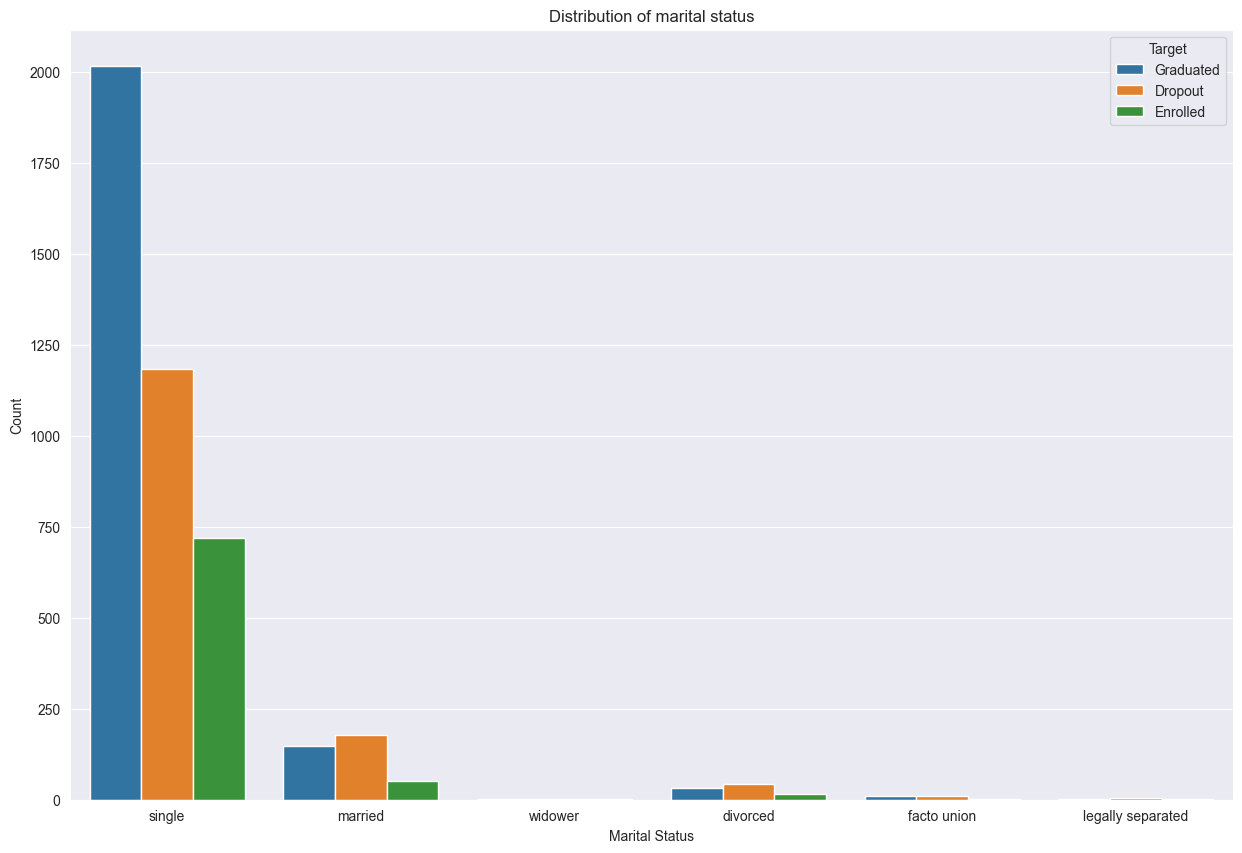

In [12]:
data_marital_status = group_by(df, column="Marital Status")
df_distribution_marital_status = melt(data_marital_status, column="Marital Status")

df_distribution_marital_status.replace({
    "Target_graduated": "Graduated",
    "Target_dropout": "Dropout",
    "Target_enrolled": "Enrolled",
}, inplace=True)

df_distribution_marital_status.replace({"Marital Status": {1 : "single",
                                                           2 : "married",
                                                           3 : "widower",
                                                           4 : "divorced",
                                                           5 : "facto union",
                                                           6 : "legally separated"}}, inplace=True)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))
sns.barplot(x="Marital Status",
            y="Count",
            data=df_distribution_marital_status,
            hue="Target",
            legend=True,
            ax=ax)
ax.set_xlabel("Marital Status")
ax.set_ylabel("Count")
ax.set_title("Distribution of marital status")
plt.show()


#### Insight
Marital status seems to have an influence on student outcomes, as can be seen from the data distribution. The group with "single" status dominates the number of individuals who graduated, dropped out, or are still enrolled. This shows that single individuals tend to focus more on education because they have fewer dependents than those who are married. In contrast, the number of individuals who graduated or are still enrolled in formal education is much lower in the group with “married” status, which may be due to greater family or work responsibilities. Groups with the statuses "widower" and "divorced" show very low rates in relation to education, which could indicate that their priorities may be more focused on life needs or personal situations. Overall, these data suggest that marital status can influence participation and outcomes in formal education, with single individuals having greater odds of completing education compared with those with other marital statuses.

### 5. Apakah mahasiswa scholarship holder cenderung lebih banyak yang lulus dibandingkan yang tidak?

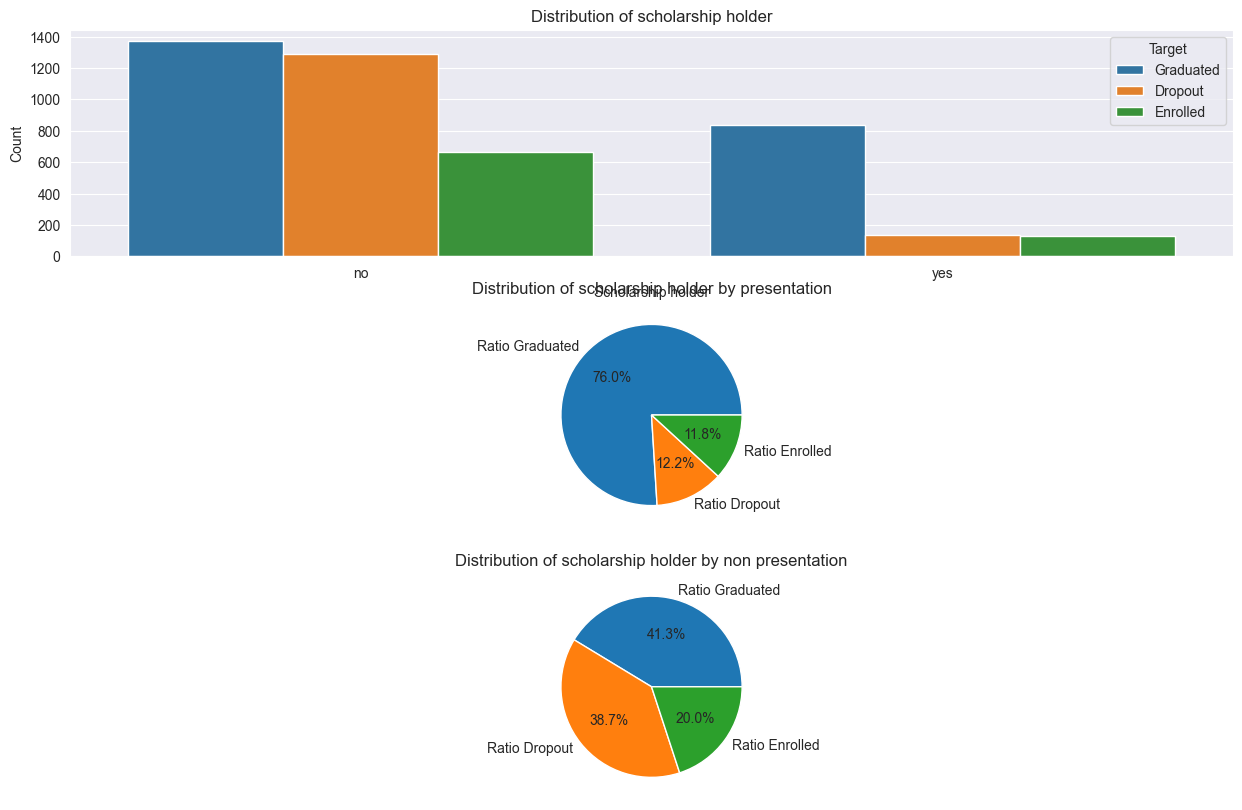

In [13]:
import numpy as np
# Intialize students scholarship
data_scholarship_holder = group_by(df, column="Scholarship holder")
df_distribution_scholarship_holder = melt(data_scholarship_holder, column="Scholarship holder")

df_distribution_scholarship_holder.replace({
    "Target_graduated": "Graduated",
    "Target_dropout": "Dropout",
    "Target_enrolled": "Enrolled",
}, inplace=True)

df_distribution_scholarship_holder.replace({"Scholarship holder": {1 : "yes", 0 : "no"}}, inplace=True)

# Initialize ratio students scholarship
df_ratio_scholarship = data_scholarship_holder.copy()
df_ratio_scholarship.drop(index=0, inplace=True)
df_ratio_scholarship["Total"] = df_ratio_scholarship["Target_graduated"] + df_ratio_scholarship["Target_dropout"] + df_ratio_scholarship["Target_enrolled"]

df_ratio_scholarship["Ratio Graduated"] = df_ratio_scholarship["Target_graduated"] / df_ratio_scholarship["Total"]
df_ratio_scholarship["Ratio Dropout"] = df_ratio_scholarship["Target_dropout"] / df_ratio_scholarship["Total"]
df_ratio_scholarship["Ratio Enrolled"] = df_ratio_scholarship["Target_enrolled"] / df_ratio_scholarship["Total"]

# Initialize ratio non students scholarship
df_ratio_non_scholarship = data_scholarship_holder.copy()
df_ratio_non_scholarship.drop(index=1, inplace=True)
df_ratio_non_scholarship["Total"] = df_ratio_non_scholarship["Target_graduated"] + df_ratio_non_scholarship["Target_dropout"] + df_ratio_non_scholarship["Target_enrolled"]

df_ratio_non_scholarship["Ratio Graduated"] = df_ratio_non_scholarship["Target_graduated"] / df_ratio_non_scholarship["Total"]
df_ratio_non_scholarship["Ratio Dropout"] = df_ratio_non_scholarship["Target_dropout"] / df_ratio_non_scholarship["Total"]
df_ratio_non_scholarship["Ratio Enrolled"] = df_ratio_non_scholarship["Target_enrolled"] / df_ratio_non_scholarship["Total"]

# Initialize ratio label and data
label_ratio = ["Ratio Graduated", "Ratio Dropout", "Ratio Enrolled"]
data_ratio_scholarship_holder = np.array(df_ratio_scholarship[label_ratio].values.tolist()).flatten()
data_ratio_non_scholarship_holder = np.array(df_ratio_non_scholarship[label_ratio].values.tolist()).flatten()

fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, figsize=(15, 10))
sns.barplot(x="Scholarship holder",
            y="Count",
            data=df_distribution_scholarship_holder,
            hue="Target",
            legend=True,
            ax=ax1)
ax1.set_xlabel("Scholarship holder")
ax1.set_ylabel("Count")
ax1.set_title("Distribution of scholarship holder")

ax2.pie(data_ratio_scholarship_holder, labels=label_ratio, autopct='%1.1f%%')
ax2.set_title("Distribution of scholarship holder by presentation")

ax3.pie(data_ratio_non_scholarship_holder, labels=label_ratio, autopct='%1.1f%%')
ax3.set_title("Distribution of scholarship holder by non presentation")
plt.show()

#### Insight
Students who receive scholarships (scholarship holders) show a higher tendency to graduate compared to students who do not receive scholarships (non-scholarship holders). Data shows that 76.0% of scholarship recipient students successfully graduated, much higher than only 41.3% of non-scholarship recipient students. In addition, the dropout rate for students receiving scholarships is much lower, namely only 12.2%, compared to 38.7% for non-scholarship students. In fact, the percentage of students who are still registered (enrolled) is also smaller among scholarship recipients (11.8%) compared to non-recipients (20.0%). This shows that scholarships not only support students' graduation, but also help them complete their studies more focused and on time. Based on this analysis, scholarships have been shown to have a significant positive impact on academic success, so universities may consider expanding scholarship programs and providing additional support for non-scholarship students to increase their chances of graduation.

### 6. Bagaimana distribusi target berdasarkan admission grade? Apakah nilai yang lebih tinggi berkorelasi dengan kelulusan (graduate)?

In [14]:
def group_grade(grade):
    try:
        if 0 >= grade <= 49:
            return "very low"
        elif 50 >= grade <= 99:
            return "low"
        elif 100 >= grade <= 149:
            return "medium"
        elif 150 >= grade <= 179:
            return "high"
        elif 180 >= grade <= 200:
            return "very high"
    except:
        raise ValueError("Invalid grade")

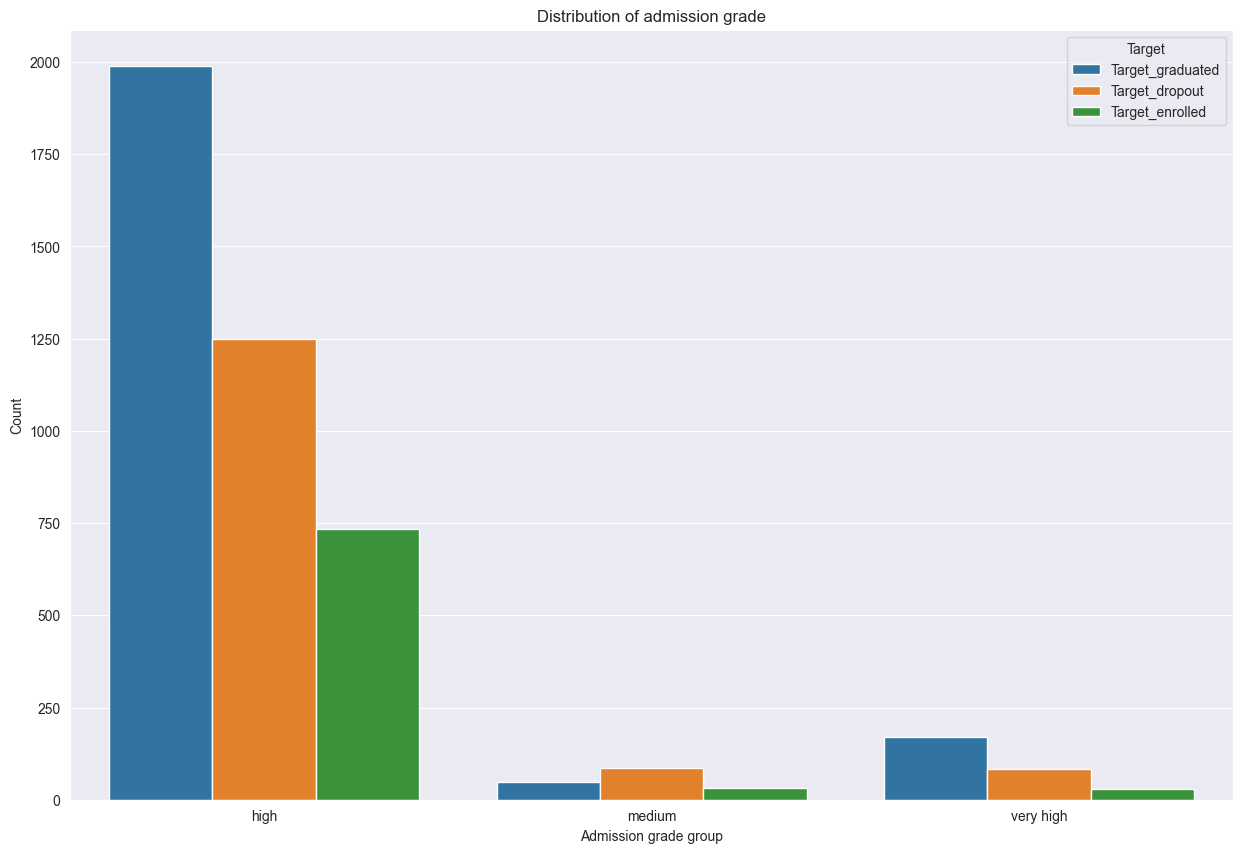

In [15]:
# Initialize admission grade group
df["Admission grade group"] = df["Admission grade"].apply(group_grade)
data_grade = group_by(df, column="Admission grade group")
df_distribution_grade = melt(data_grade, column="Admission grade group")

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))
sns.barplot(x="Admission grade group",
            y="Count",
            data=df_distribution_grade,
            hue="Target",
            legend=True,
            ax=ax)
ax.set_xlabel("Admission grade group")
ax.set_ylabel("Count")
ax.set_title("Distribution of admission grade")
plt.show()

#### Insight
The based on admission grade shows that students with high scores (150-179) have a higher graduation rate compared to other score groups. Meanwhile, students with very high scores (180-200) actually had a slightly lower graduation rate than the high score group. On the other hand, students with medium scores (100-148) tend to have a higher dropout rate than the other two groups. This shows that although a higher admission grade score is generally positively correlated with graduation, this correlation is not linear; students with very high scores do not always have a better chance of graduating than those in the high score group. Other factors, such as motivation, academic pressure, or support received during the study, may also influence these outcomes.

### 7. Apakah waktu kehadiran kuliah (daytime/evening attendance) berkaitan dengan kemungkinan mahasiswa lulus?

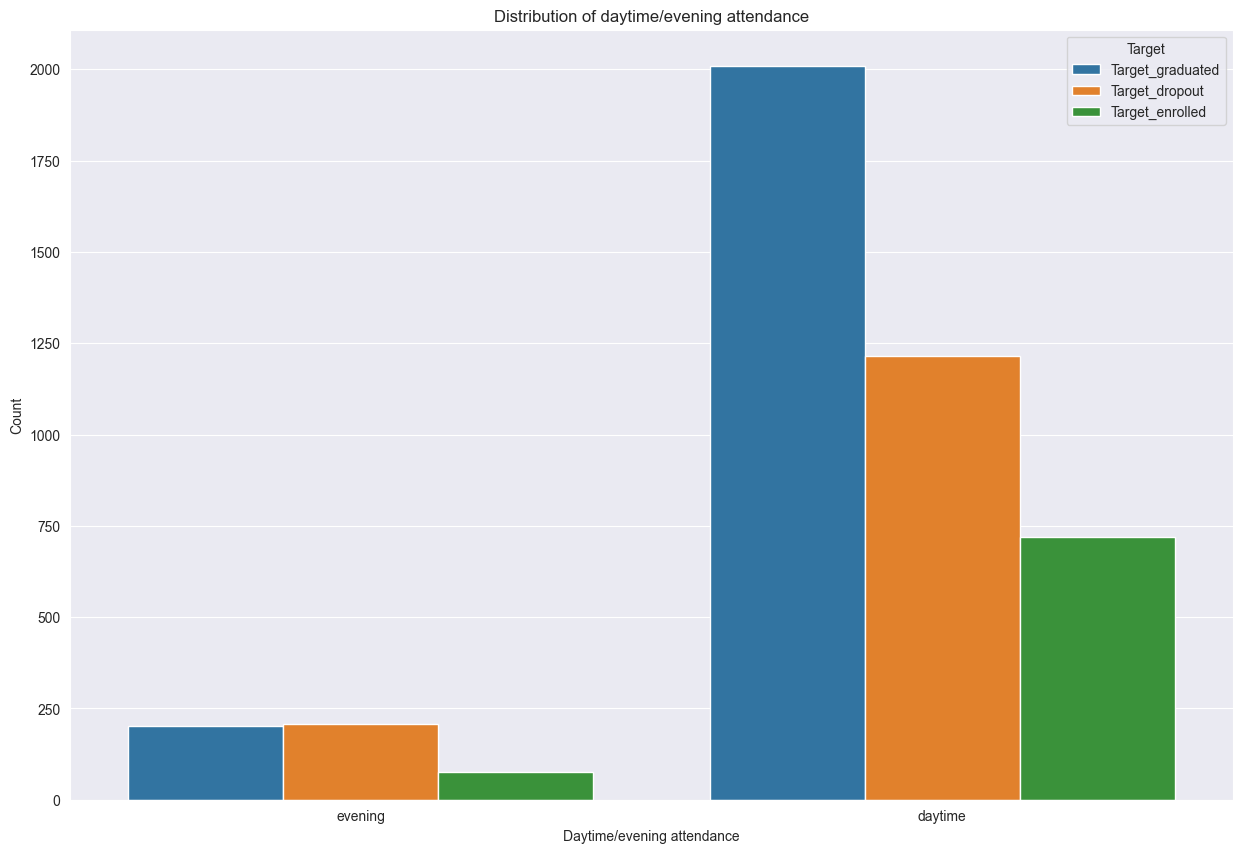

In [16]:
data_attendance = group_by(df, column="Daytime/evening attendance")
df_distribution_attendance = melt(data_attendance, column="Daytime/evening attendance")

df_distribution_attendance.replace({"Daytime/evening attendance": {1 : "daytime", 0 : "evening"}}, inplace=True)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))
sns.barplot(x="Daytime/evening attendance",
            y="Count",
            data=df_distribution_attendance,
            hue="Target",
            legend=True,
            ax=ax)
ax.set_xlabel("Daytime/evening attendance")
ax.set_ylabel("Count")
ax.set_title("Distribution of daytime/evening attendance")

# sns.heatmap()
plt.show()

#### Insight
Based on existing data, students who attend lectures at night (evening attendance) tend to have a higher chance of dropping out compared to students who attend lectures during the day (daytime attendance). This shows that lecture attendance time has an influence on student graduation rates.


### 8. Apakah jumlah curricular units grade memengaruhi hasil akhir mahasiswa?

In [17]:
# Create a new column to check the difference between second semester grades and first semester grades
df_grade = df[["Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)", "Target"]]
df_grade['Grade Difference'] = df_grade["Curricular units 2nd sem (grade)"] - df_grade["Curricular units 1st sem (grade)"]

# Determine if the grade in the second semester increased or decreased
df_grade['Grade Trend'] = df_grade['Grade Difference'].apply(lambda x: 'Increase' if x > 0 else 'Decrease' if x < 0 else 'No Change')
df_grade

/var/folders/dw/vp6jrdxx0k9cnkpqssvxcxhh0000gn/T/ipykernel_62646/207802446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grade['Grade Difference'] = df_grade["Curricular units 2nd sem (grade)"] - df_grade["Curricular units 1st sem (grade)"]
/var/folders/dw/vp6jrdxx0k9cnkpqssvxcxhh0000gn/T/ipykernel_62646/207802446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grade['Grade Trend'] = df_grade['Grade Difference'].apply(lambda x: 'Increase' if x > 0 else 'Decrease' if x < 0 else 'No Change')


,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target,Grade Difference,Grade Trend
0,0.000000,0.000000,Dropout,0.000000,No Change
1,14.000000,13.666667,Graduate,-0.333333,Decrease
2,0.000000,0.000000,Dropout,0.000000,No Change
3,13.428571,12.400000,Graduate,-1.028571,Decrease
4,12.333333,13.000000,Graduate,0.666667,Increase
...,...,...,...,...,...
4419,13.600000,12.666667,Graduate,-0.933333,Decrease
4420,12.000000,11.000000,Dropout,-1.000000,Decrease
4421,14.912500,13.500000,Dropout,-1.412500,Decrease
4422,13.800000,12.000000,Graduate,-1.800000,Decrease


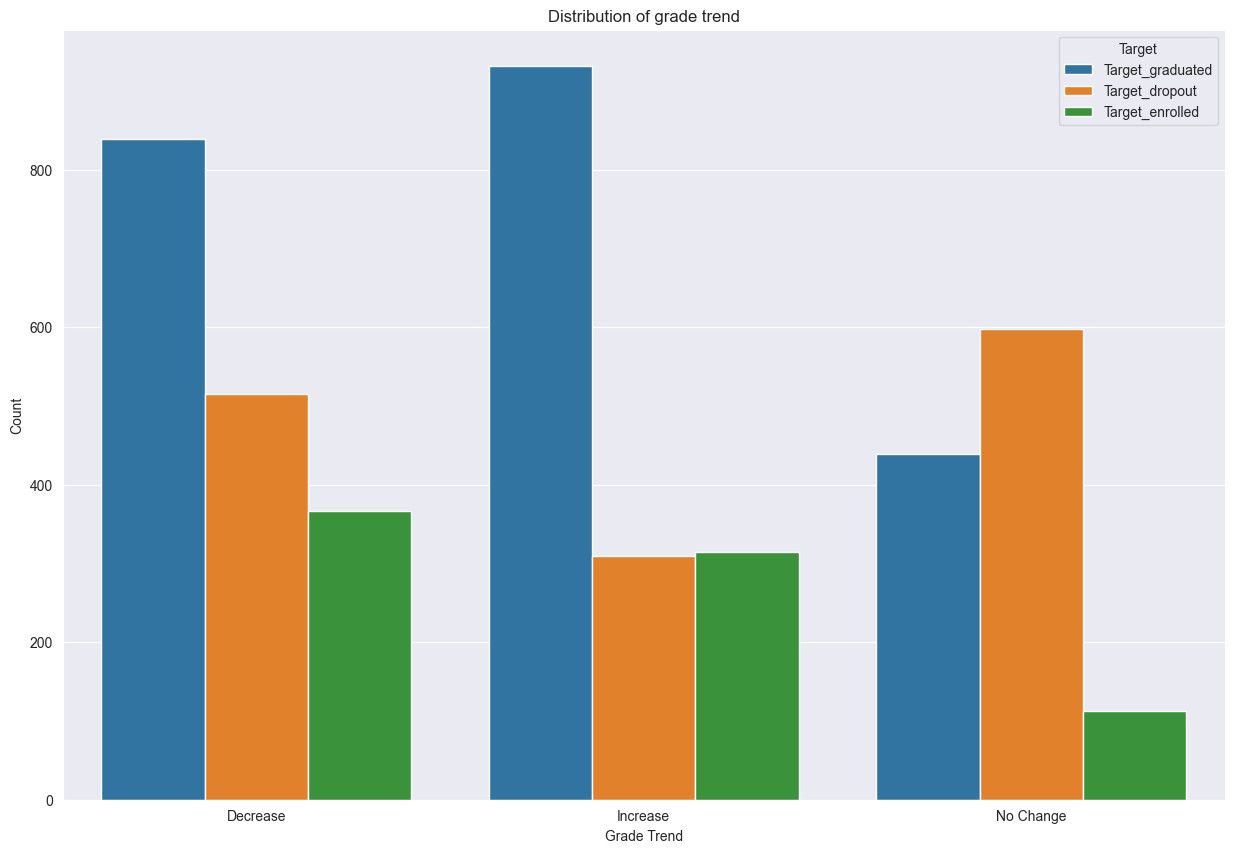

In [18]:
data_grade_trend = group_by(df_grade, column="Grade Trend")

df_distribution_grade_trend = melt(data_grade_trend, column="Grade Trend")

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))
sns.barplot(x="Grade Trend",
            y="Count",
            data=df_distribution_grade_trend,
            hue="Target",
            legend=True,
            ax=ax)
ax.set_xlabel("Grade Trend")
ax.set_ylabel("Count")
ax.set_title("Distribution of grade trend")
plt.show()


#### Insight
Based on the data, the number of curricular units grade has a significant influence on student final results. Students who experience an increase in course unit grades from the first semester to the second semester tend to have a higher graduation rate compared to students whose grades remain the same or decrease. On the other hand, students with unchanged grades tend to have a higher dropout rate compared to those who graduated or are still enrolled. In addition, students who experienced a drop in grades also showed less good results, even though their graduation rate was still higher than the dropout rate.

### 9. Apakah course tertentu memiliki tingkat dropout lebih tinggi dibandingkan yang lain?

In [19]:
def group_course(course):
    try:
        if course == 33 or course == 9119 or course == 9130:
            return "Technology and Engineering"
        elif course == 171 or course == 9070 or course == 9670 or course == 9773:
            return "Design and Media"
        elif course == 9147 or course == 9991:
            return "Business Management"
        elif course == 8014 or course == 9238 or course == 9254:
            return  "Social Sciences and Public Services"
        elif course == 9085 or course == 9500 or course == 9556:
            return "Health and Nursing"
        elif course == 9853:
            return "Education"
        elif course == 9003:
            return "Agriculture and Environment"
        else:
            return "Others"
    except:
        raise ValueError("Invalid course")

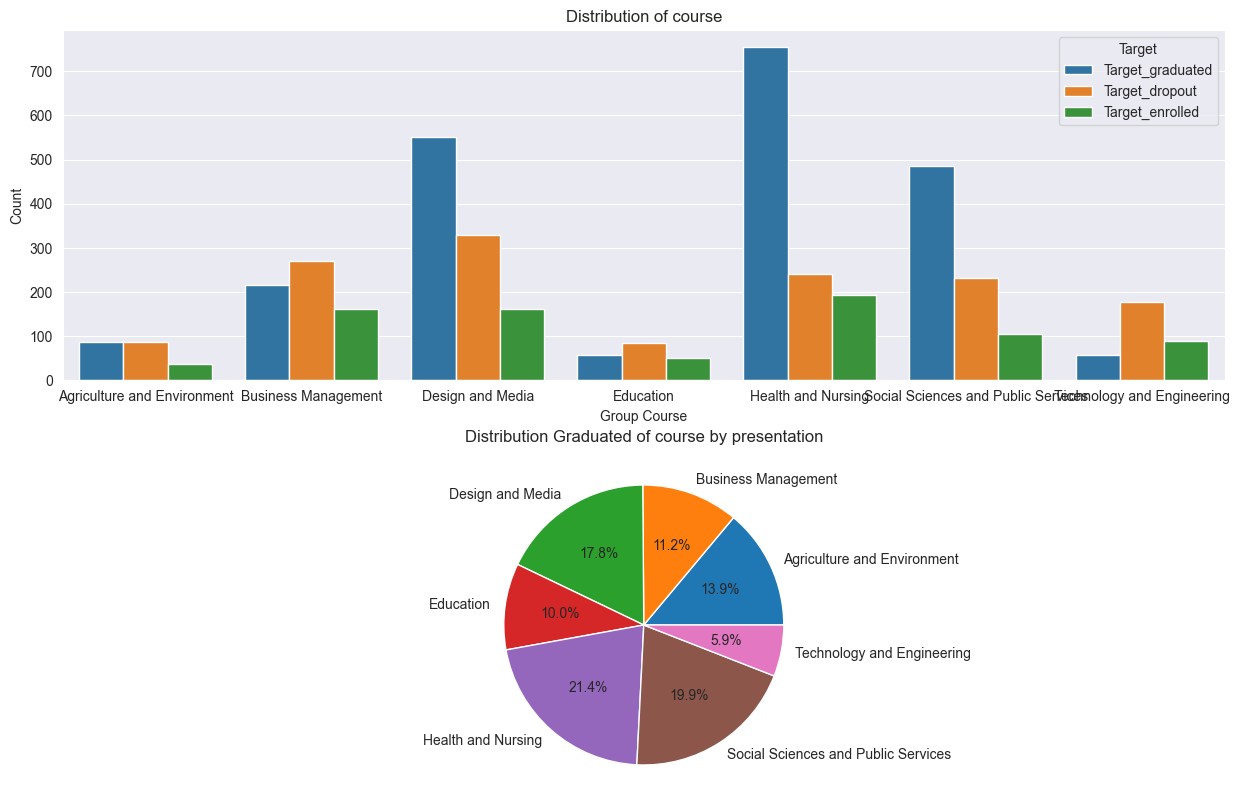

In [20]:
df["Group Course"] = df["Course"].apply(group_course)
data_couse = group_by(df, column="Group Course")
df_distribution_course = melt(data_couse, column="Group Course")

# Initialiaze ratio group course
df_ratio_group_course = data_couse.copy()
df_ratio_group_course["Total"] = df_ratio_group_course["Target_graduated"] + df_ratio_group_course["Target_dropout"] + df_ratio_group_course["Target_enrolled"]
df_ratio_group_course["Ratio Graduated"] = df_ratio_group_course["Target_graduated"] / df_ratio_group_course["Total"]

# Label ratio data
label_ratio = ["Group Course","Ratio Graduated"]
data_ratio_group_course = df_ratio_group_course[label_ratio]

fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(15, 10))
sns.barplot(x="Group Course",
            y="Count",
            data=df_distribution_course,
            hue="Target",
            legend=True,
            ax=ax1)
ax1.set_xlabel("Group Course")
ax1.set_ylabel("Count")
ax1.set_title("Distribution of course")

ax2.pie(data_ratio_group_course["Ratio Graduated"], labels=data_ratio_group_course["Group Course"] ,autopct='%1.1f%%')
ax2.set_title("Distribution Graduated of course by presentation")
plt.show()

#### Insight
Based on the data, there are significant variations in dropout rates between various fields of study (courses). Study programs in the fields of science and technology, education, and business management show higher dropout rates than other fields. This can be caused by several factors, such as the difficulty of the curriculum, the student's lack of interest or suitability for the chosen program, as well as specific challenges in the field that affect the student's ability to complete their studies.

In contrast, study programs in the fields of health and nursing, social sciences and public services, and design and media have higher graduation rates.

### 10. Bagaimana hubungan antara international student dengan hasil akhir mahasiswa?

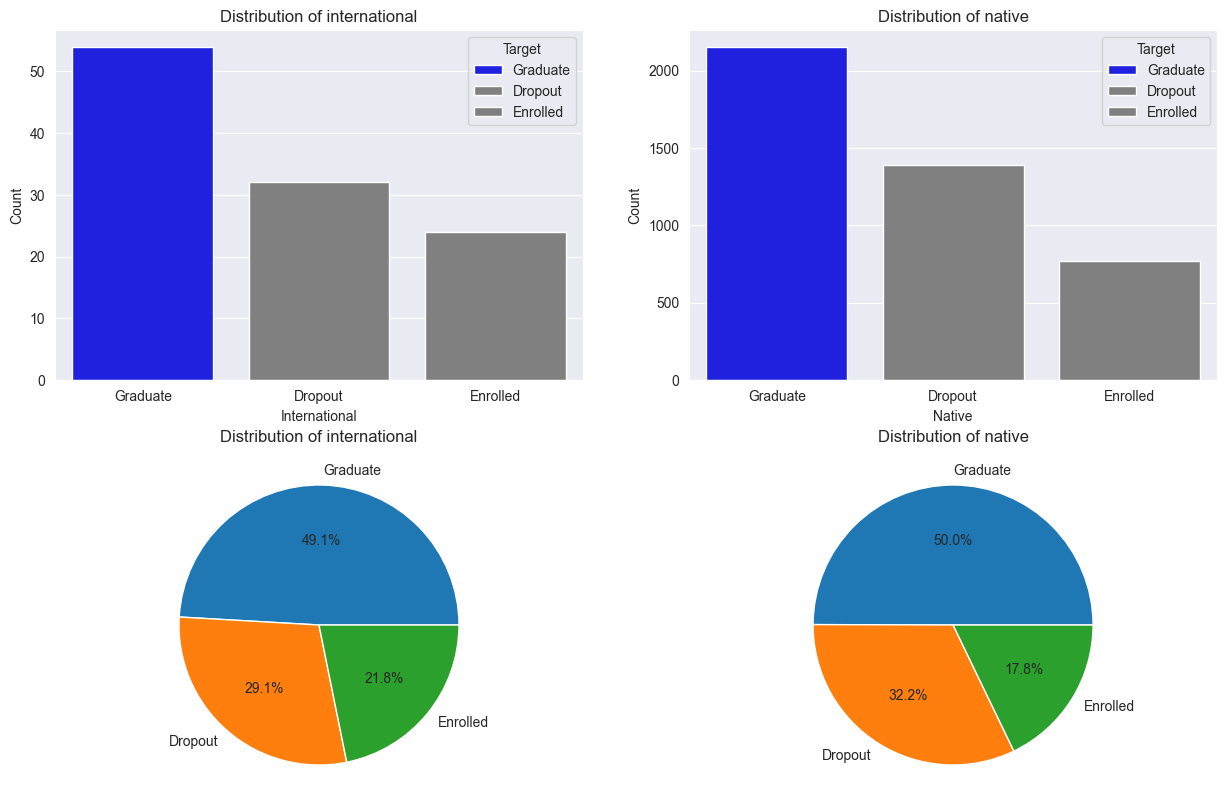

In [21]:
international_students = df[df["International"] == 1]
native_students =df[df["International"] == 0]

distribution_international = international_students["Target"].value_counts()
distribution_native = native_students["Target"].value_counts()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
sns.barplot(x=distribution_international.index,
            y=distribution_international.values,
            palette=["blue", "gray", "gray"],
            hue=distribution_international.index,
            legend=True,
            ax=ax1)
ax1.set_xlabel("International")
ax1.set_ylabel("Count")
ax1.set_title("Distribution of international")

sns.barplot(x=distribution_native.index,
            y=distribution_native.values,
            palette=["blue", "gray", "gray"],
            hue=distribution_native.index,
            legend=True,
            ax=ax2)

ax2.set_xlabel("Native")
ax2.set_ylabel("Count")
ax2.set_title("Distribution of native")

ax3.pie(distribution_international, labels=distribution_international.index, autopct='%1.1f%%')
ax3.set_title("Distribution of international")

ax4.pie(distribution_native, labels=distribution_native.index, autopct='%1.1f%%')
ax4.set_title("Distribution of native")

plt.show()


#### Insight
Based on the data, status as an international student or local student (native student) does not show a significant difference in student final results. International students have a graduation ratio of 49.1%, while local students have a graduation ratio of 50%. These ratios are very close, so there is no strong indication that international status affects the likelihood of graduating, dropping out, or remaining enrolled.


# Data Preprocessing

### Choose Feature

In [22]:
df_pre = df.copy()
for column in df_pre.columns:
    if df_pre[column].dtype == "object":
        if column != "Target":
            df_pre[column] = df_pre[column].astype("category")
            df_pre[column] = df_pre[column].cat.codes

# Encoding labels
df_pre['Target Encoded'] = OrdinalEncoder(categories = [['Dropout', 'Enrolled', 'Graduate']]).fit_transform(df_pre[['Target']])

In [23]:
df_pre.drop(columns=["Target"], inplace=True)
df_pre.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Age group,Admission grade group,Group Course,Target Encoded
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0.000000,0,10.8,1.4,1.74,1,0,2,0.0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,13.666667,0,13.9,-0.3,0.79,1,0,5,2.0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0.000000,0,10.8,1.4,1.74,1,0,2,0.0
3,1,17,2,9773,1,1,122.0,1,38,37,...,5,12.400000,0,9.4,-0.8,-3.12,1,0,2,2.0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,13.000000,0,13.9,-0.3,0.79,3,0,5,2.0


In [24]:
# Categorical features
cats = ['Marital Status', 'Application mode', 'Application order',
        'Course','Daytime/evening attendance', 'Previous qualification',
        'Nacionality',"Mother's qualification", "Father's qualification",
        "Mother's occupation", "Father's occupation", 'Displaced',
        'Educational special needs', 'Debtor','Tuition fees up to date',
        'Gender', 'Scholarship holder','International', "Age group", "Group Course", "Admission grade group"]

# Get the p-values from Chi-Square indenpendence tests
p_value = []
for col in cats:
    crosstable = pd.crosstab(index=df_pre[col], columns=df_pre["Target Encoded"])
    p = chi2_contingency(crosstable)[1]
    p_value.append(p)

chi2_result = pd.DataFrame({
    'Variable': cats,
    'P_value': [round(ele, 5) for ele in p_value]
})
chi2_result.sort_values(by='P_value', ascending=False)

,Variable,P_value
12,Educational special needs,0.72540
17,International,0.52731
6,Nacionality,0.24223
0,Marital Status,0.00000
11,Displaced,0.00000
19,Group Course,0.00000
18,Age group,0.00000
16,Scholarship holder,0.00000
15,Gender,0.00000
14,Tuition fees up to date,0.00000


In [25]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 40 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

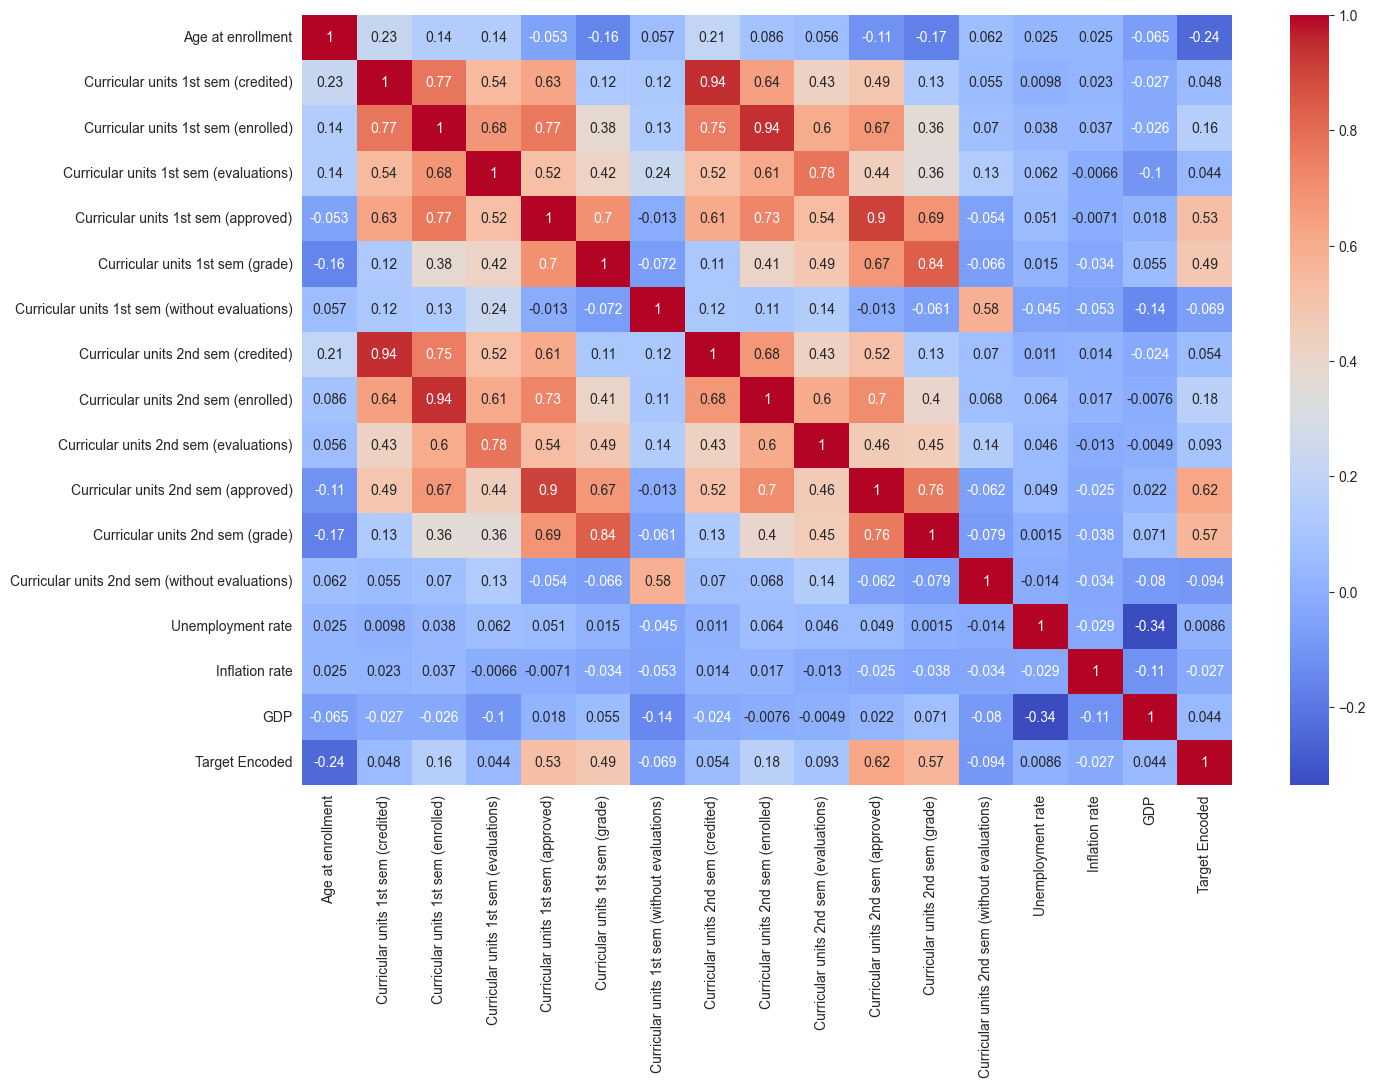

In [26]:
# Numeric features
num_features = df_pre[['Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)',
       'Unemployment rate', 'Inflation rate', 'GDP', 'Target Encoded']]

# Heatmap of correlation matrix
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
sns.heatmap(num_features.corr(), annot=True, cmap="coolwarm", ax=ax)
plt.show()


In [27]:
# Averaging academic performance data across two semesters
df_pre['avg credited'] = df_pre[['Curricular units 1st sem (credited)',
                                'Curricular units 2nd sem (credited)']].mean(axis = 1)
df_pre['avg enrolled'] = df_pre[['Curricular units 1st sem (enrolled)',
                                'Curricular units 2nd sem (enrolled)']].mean(axis = 1)
df_pre['avg evaluations'] = df_pre[['Curricular units 1st sem (evaluations)',
                                   'Curricular units 2nd sem (evaluations)']].mean(axis = 1)
df_pre['avg approved'] = df_pre[['Curricular units 1st sem (approved)',
                                'Curricular units 2nd sem (approved)']].mean(axis = 1)
df_pre['avg grade'] = df_pre[['Curricular units 1st sem (grade)',
                             'Curricular units 2nd sem (grade)']].mean(axis = 1)
df_pre['avg without evaluations'] = df_pre[['Curricular units 1st sem (without evaluations)',
                                           'Curricular units 2nd sem (without evaluations)']].mean(axis = 1)

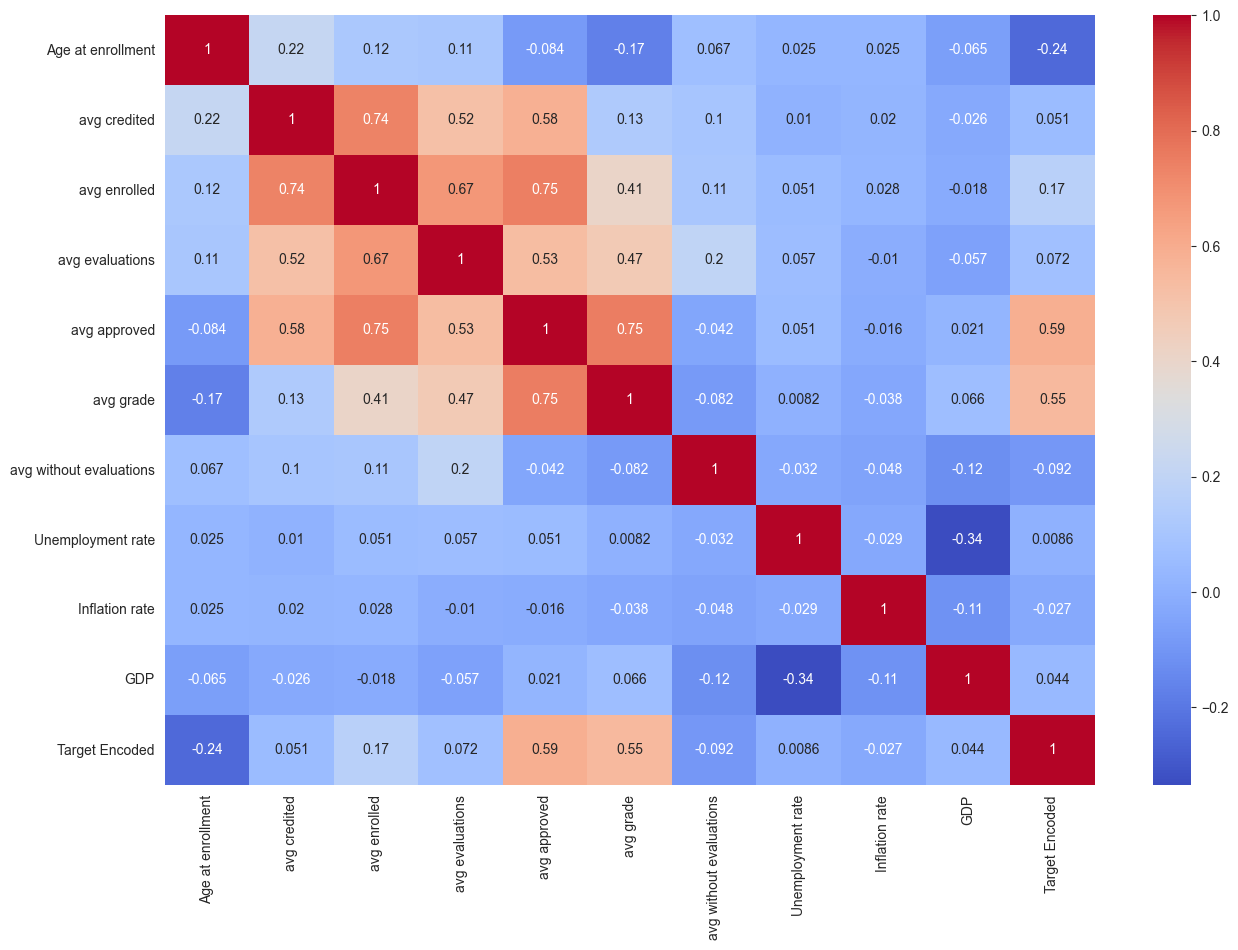

In [28]:
# plot the heat map of correlation matrix again
num_features_avg = df_pre[['Age at enrollment', 'avg credited', 'avg enrolled',
                              'avg evaluations', 'avg approved',
                              'avg grade', 'avg without evaluations',
                              'Unemployment rate', 'Inflation rate',
                              'GDP', 'Target Encoded']]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
sns.heatmap(num_features_avg.corr(), annot=True, cmap="coolwarm", ax=ax)
plt.show()

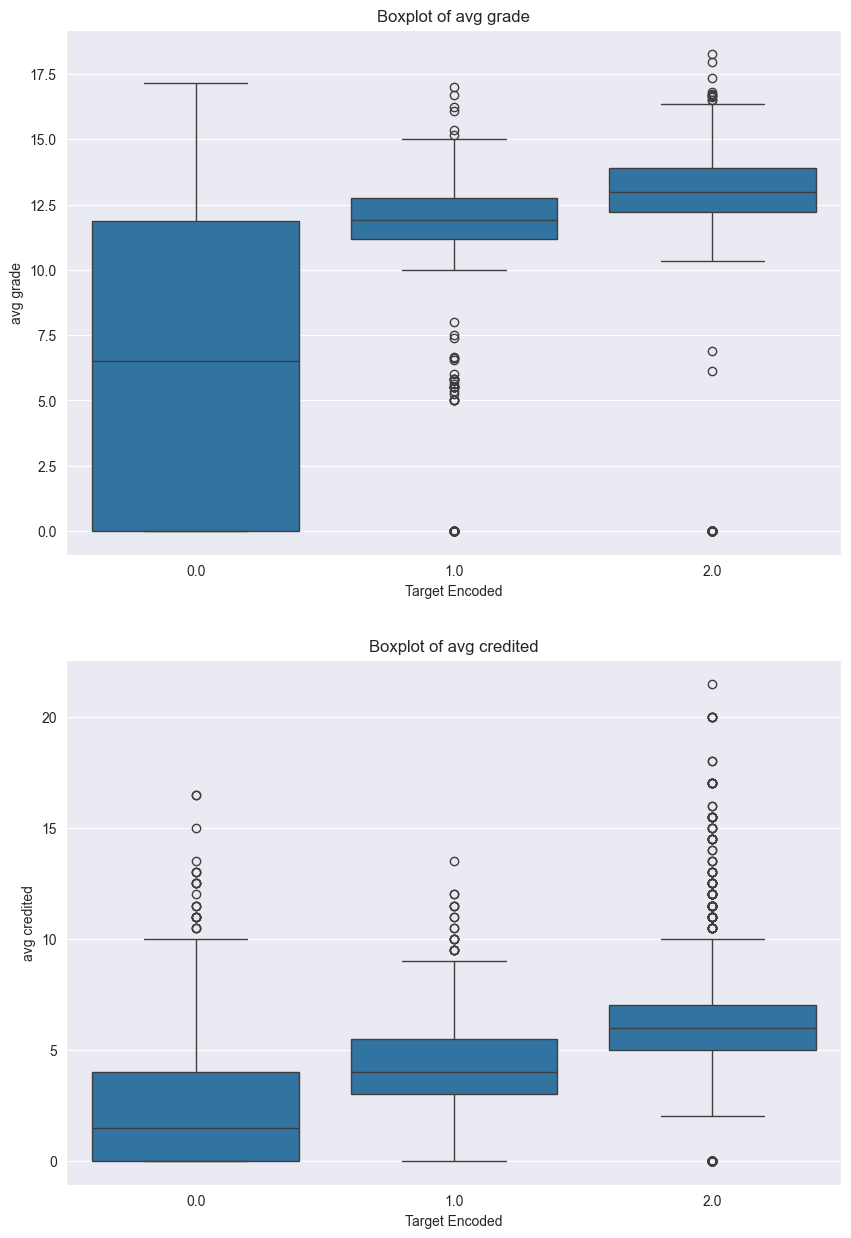

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 15))
sns.boxplot(x="Target Encoded", y="avg grade", data=df_pre, ax=ax1)
ax1.set_xlabel("Target Encoded")
ax1.set_ylabel("avg grade")
ax1.set_title("Boxplot of avg grade")

sns.boxplot(x="Target Encoded", y="avg approved", data=df_pre, ax=ax2)
ax2.set_xlabel("Target Encoded")
ax2.set_ylabel("avg credited")
ax2.set_title("Boxplot of avg credited")
plt.show()

In [30]:
# Remove otliers
df_pre.drop(df_pre.loc[(df_pre['avg approved'] == 0) & (df_pre['Target Encoded'] == 2)].index, inplace=True)

In [31]:
# Drop features which don't be needed
remove_features = [
    "Age at enrollment",
    "Nacionality",
    "International",
    "Educational special needs",
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'avg credited',
    'avg evaluations',
    'avg without evaluations',
    'Unemployment rate',
    "GDP",
    "Inflation rate"]
df_pre.drop(remove_features, axis=1, inplace=True)

In [32]:
df_pre.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,...,Tuition fees up to date,Gender,Scholarship holder,Age group,Admission grade group,Group Course,Target Encoded,avg enrolled,avg approved,avg grade
0,1,17,5,171,1,1,122.0,19,12,5,...,1,1,0,1,0,2,0.0,0.0,0.0,0.000000
1,1,15,1,9254,1,1,160.0,1,3,3,...,0,1,0,1,0,5,2.0,6.0,6.0,13.833333
2,1,1,5,9070,1,1,122.0,37,37,9,...,0,1,0,1,0,2,0.0,6.0,0.0,0.000000
3,1,17,2,9773,1,1,122.0,38,37,5,...,1,0,0,1,0,2,2.0,6.0,5.5,12.914286
4,2,39,1,8014,0,1,100.0,37,38,9,...,1,0,0,3,0,5,2.0,6.0,5.5,12.666667


In [33]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4423
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marital Status                  4349 non-null   int64  
 1   Application mode                4349 non-null   int64  
 2   Application order               4349 non-null   int64  
 3   Course                          4349 non-null   int64  
 4   Daytime/evening attendance      4349 non-null   int64  
 5   Previous qualification          4349 non-null   int64  
 6   Previous qualification (grade)  4349 non-null   float64
 7   Mother's qualification          4349 non-null   int64  
 8   Father's qualification          4349 non-null   int64  
 9   Mother's occupation             4349 non-null   int64  
 10  Father's occupation             4349 non-null   int64  
 11  Admission grade                 4349 non-null   float64
 12  Displaced                       4349 no

### Undesampling

Text(0.5, 1.0, 'Distribution of target encoded')

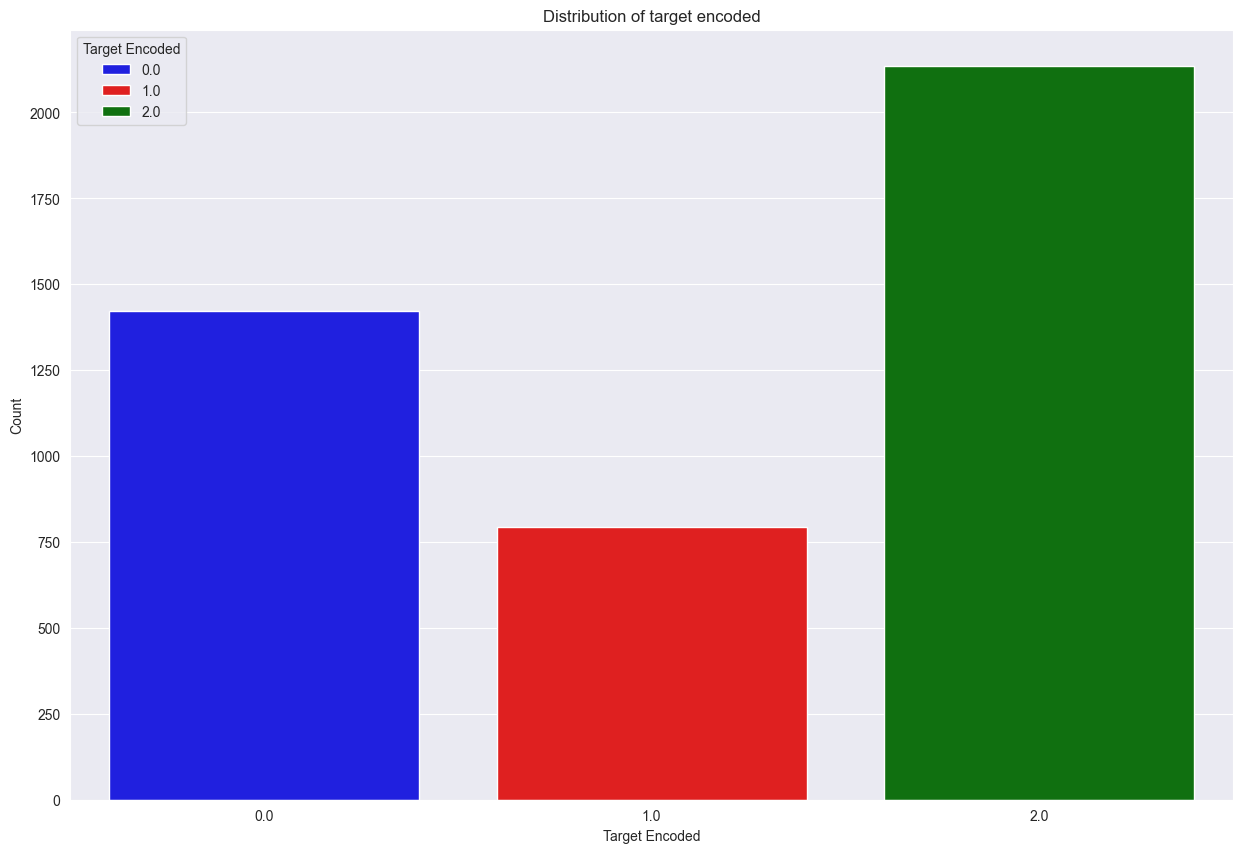

In [34]:
data_target_encoded = df_pre["Target Encoded"].value_counts()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
sns.barplot(x=data_target_encoded.index,
            y=data_target_encoded.values,
            hue=data_target_encoded.index,
            palette=["blue", "red", "green"],
            legend=True,
            ax=ax)
ax.set_xlabel("Target Encoded")
ax.set_ylabel("Count")
ax.set_title("Distribution of target encoded")

In [35]:
data_target_encoded

Target Encoded
2.0    2134
0.0    1421
1.0     794
Name: count, dtype: int64

In [36]:
df_majority_1 = df_pre[df_pre["Target Encoded"] == 2]
df_majority_2 = df_pre[df_pre["Target Encoded"] == 0]
df_minority = df_pre[df_pre["Target Encoded"] == 1]

df_majority_1_undersampled = resample(df_majority_1, n_samples=794, random_state=42)
df_majority_2_undersampled = resample(df_majority_2, n_samples=794, random_state=42)

undersmapled_df = pd.concat([df_minority, df_majority_1_undersampled, df_majority_2_undersampled]).reset_index(drop=True)
undersampled_df = shuffle(undersmapled_df, random_state=42)
undersampled_df.reset_index(drop=True, inplace=True)
undersampled_df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,...,Tuition fees up to date,Gender,Scholarship holder,Age group,Admission grade group,Group Course,Target Encoded,avg enrolled,avg approved,avg grade
0,4,39,1,8014,0,1,133.1,37,37,9,...,1,0,1,3,0,5,0.0,5.5,0.0,0.000000
1,1,18,1,9238,1,1,122.0,1,3,9,...,1,1,0,1,0,5,2.0,6.0,6.0,10.333333
2,1,17,1,9773,1,1,136.0,1,38,9,...,1,0,0,0,0,2,2.0,6.0,6.0,12.214286
3,1,51,1,8014,0,1,120.0,1,1,4,...,0,1,0,2,0,5,0.0,9.0,5.5,10.464286
4,1,1,5,9070,1,1,122.0,37,37,9,...,0,1,0,1,0,2,0.0,6.0,0.0,0.000000


In [37]:
undersampled_df["Target Encoded"].value_counts()

Target Encoded
0.0    794
2.0    794
1.0    794
Name: count, dtype: int64

### Split data train and data test

In [38]:
x = undersampled_df.drop(columns=["Target Encoded"])
y = undersampled_df["Target Encoded"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [39]:
x_train

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age group,Admission grade group,Group Course,avg enrolled,avg approved,avg grade
925,1,15,1,33,1,1,133.1,2,3,2,...,0,1,1,0,1,1,6,7.0,5.5,12.803571
1420,1,42,1,9147,1,1,139.0,3,38,2,...,0,1,0,0,1,0,1,5.0,2.5,11.178571
457,1,44,1,9003,1,39,130.0,1,1,3,...,0,1,1,0,1,0,0,8.5,5.5,11.533333
1741,1,1,3,9254,1,1,122.0,19,38,3,...,0,1,0,1,1,0,5,6.0,5.0,12.800000
1846,1,1,1,9070,1,1,124.0,37,37,9,...,0,1,1,0,1,0,2,6.0,6.0,13.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1,53,1,9003,1,42,150.0,1,38,8,...,0,1,0,1,1,0,0,11.0,11.0,13.842308
1095,1,16,1,171,1,1,145.0,3,3,3,...,0,1,0,0,1,2,2,15.0,10.0,13.232323
1130,1,1,3,9085,1,1,126.0,38,1,9,...,0,1,0,1,0,0,4,5.0,3.0,13.333333
1294,1,1,1,9773,1,1,158.0,38,38,9,...,0,1,0,1,1,0,2,6.0,6.0,14.750000


### Insight

The dataset consists of 23 features and 3 labels encoded as follows: 0 for dropout, 1 for enrolled, and 2 for graduated. To address data imbalance, undersampling was applied, resulting in 769 data points for each label. Additionally, the dataset was split into training and testing sets, with the test set comprising 20% of the total data

# Modeling

### Using 3 labels

#### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {'n_neighbors': range(1, 21)}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)

best_knn_model = grid_search_knn.best_estimator_
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

In [41]:
print(f"best knn model:{best_knn_model}")
print(f"best knn parameter:{best_params_knn}")
print(f"best knn score:{best_score_knn}")

best knn model:KNeighborsClassifier(n_neighbors=1)
best knn parameter:{'n_neighbors': 1}
best knn score:0.5433070866141733


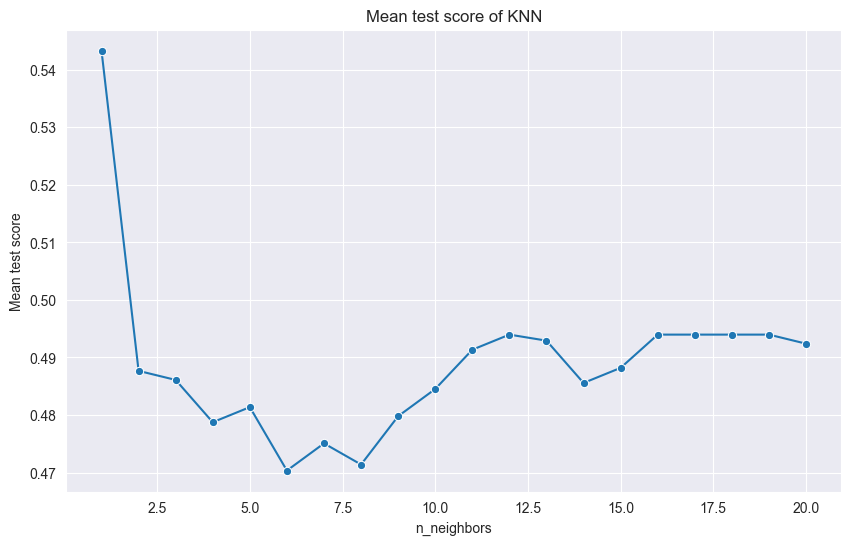

In [42]:
# Plotting the mean test score each k value
result = grid_search_knn.cv_results_
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=param_grid_knn["n_neighbors"],
             y=result["mean_test_score"], marker="o", ax=ax)
ax.set_xlabel("n_neighbors")
ax.set_ylabel("Mean test score")
ax.set_title("Mean test score of KNN")
plt.show()

#### XGB Classifier

In [43]:
# Define hyperparameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize XGBClassifier
xgb = XGBClassifier(enable_categorical = True )

# Perform grid search
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(x_train, y_train)

# Get best model, parameters, and score
best_xgb_model = grid_search_xgb.best_estimator_
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

In [44]:
print(f"best xgb model: {best_xgb_model}")
print(f"best xgb parameter: {best_params_xgb}")
print(f"best xgb score: {best_score_xgb}")

best xgb model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
best xgb parameter: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
best xgb score: 0.7364829396325459


#### Randomforest classifier

In [45]:
# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

# Get best model, parameters, and score
best_rf_model = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

In [46]:
print(f"best random forest model: {best_rf_model}")
print(f"best random forest parameters: {best_params_rf}")
print(f"best random forest score: {best_score_rf}")

best random forest model: RandomForestClassifier(max_depth=7, min_samples_leaf=2, n_estimators=200,
                       random_state=42)
best random forest parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best random forest score: 0.7039370078740157


#### Voting Classifier

In [47]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('xgb', best_xgb_model),
        ('rf', best_rf_model)
    ],
    voting='soft'
)

voting_clf.fit(x_train, y_train)
best_voting_clf_score =  voting_clf.score(x_test, y_test)
print(f"best score: {best_voting_clf_score}")

best score: 0.7526205450733753


### Using 2 labels

In [48]:
df_two_label = undersmapled_df.copy()
df_two_label.drop(df_two_label[df_two_label["Target Encoded"] == 1].index, inplace=True)
df_two_label["Target Encoded"] = df_two_label["Target Encoded"].replace([0, 2], [1, 0])
df_two_label["Target Encoded"].value_counts()

Target Encoded
0.0    794
1.0    794
Name: count, dtype: int64

In [49]:
x_two_label = df_two_label.drop(columns=["Target Encoded"])
y_two_label = df_two_label["Target Encoded"]

x_train_two_label, x_test_two_label, y_train_two_label, y_test_two_label = train_test_split(x_two_label, y_two_label, test_size=0.2, shuffle=True, random_state=42)

#### KNN

In [50]:
grid_search_knn_two_label = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn_two_label.fit(x_train_two_label, y_train_two_label)

best_knn_model_two_label = grid_search_knn_two_label.best_estimator_
best_knn_model_two_label_params = grid_search_knn_two_label.best_params_
best_knn_model_two_label_score = grid_search_knn_two_label.best_score_

In [51]:
print(f"best model:{best_knn_model_two_label}")
print(f"best params:{best_knn_model_two_label_params}")
print(f"best score:{best_knn_model_two_label_score}")

best model:KNeighborsClassifier(n_neighbors=1)
best params:{'n_neighbors': 1}
best score:0.7464566929133858


#### XGB Classifier

In [52]:
grid_search_xgb_two_label = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb_two_label.fit(x_train_two_label, y_train_two_label)

best_xgb_model_two_label = grid_search_xgb_two_label.best_estimator_
best_xgb_model_two_label_params = grid_search_xgb_two_label.best_params_
best_xgb_model_two_label_score = grid_search_xgb_two_label.best_score_

In [53]:
print(f"best model:{best_xgb_model_two_label}")
print(f"best params:{best_xgb_model_two_label_params}")
print(f"best score:{best_xgb_model_two_label_score}")

best model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
best params:{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
best score:0.9228346456692913


#### Randomforest Classifier

In [54]:
grid_search_rf_two_label = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf_two_label.fit(x_train_two_label, y_train_two_label)

best_rf_model_two_label = grid_search_rf_two_label.best_estimator_
best_rf_model_two_label_params = grid_search_rf_two_label.best_params_
best_rf_model_two_label_score = best_rf_model_two_label.score(x_test_two_label, y_test_two_label)

In [55]:
print(f"best model:{best_rf_model_two_label}")
print(f"best params:{best_rf_model_two_label_params}")
print(f"best score:{best_rf_model_two_label_score}")

best model:RandomForestClassifier(max_depth=7, min_samples_leaf=4, n_estimators=200,
                       random_state=42)
best params:{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
best score:0.89937106918239


#### Voting Classifier

In [56]:
voting_clf_two_label = VotingClassifier(estimators=[
        ('xgb', best_xgb_model_two_label),
        ('rf', best_rf_model_two_label)
    ],
    voting='soft')

voting_clf_two_label.fit(x_train_two_label, y_train_two_label)
best_voting_clf_two_label_score = voting_clf_two_label.score(x_test_two_label, y_test_two_label)
print(f"best score:{best_voting_clf_two_label_score}")

best score:0.9308176100628931


# Evaluation

### Evaluation best model using 3 labels

              precision    recall  f1-score   support

     Dropout       0.77      0.77      0.77       145
    Enrolled       0.68      0.64      0.66       159
    Graduate       0.80      0.84      0.82       173

    accuracy                           0.75       477
   macro avg       0.75      0.75      0.75       477
weighted avg       0.75      0.75      0.75       477



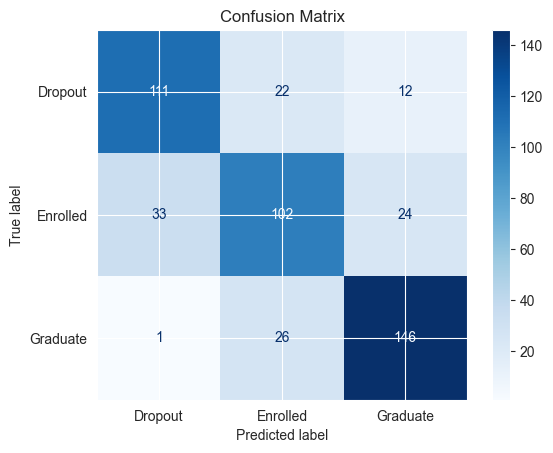

In [57]:
# Predict the result
y_pred_voting = voting_clf.predict(x_test)

# Classification report
print(classification_report(y_test, y_pred_voting, target_names=["Dropout", "Enrolled", "Graduate"]))

# Confusion matrix display
ConfusionMatrixDisplay.from_estimator(voting_clf, x_test, y_test, display_labels=["Dropout", "Enrolled", "Graduate"], cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

### Evaluation best model using 2 labels

              precision    recall  f1-score   support

     Dropout       0.91      0.97      0.94       174
   Graduated       0.96      0.89      0.92       144

    accuracy                           0.93       318
   macro avg       0.93      0.93      0.93       318
weighted avg       0.93      0.93      0.93       318



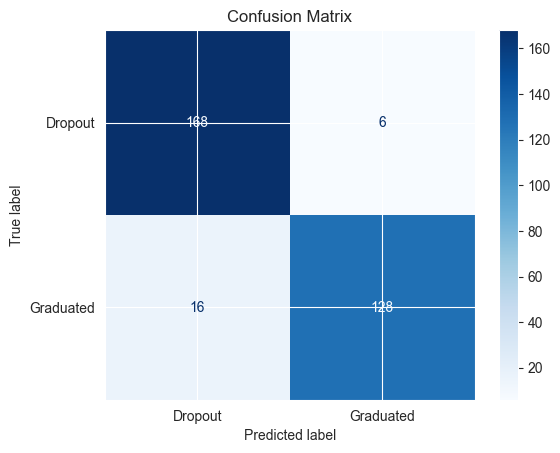

In [58]:
# Test predicted
y_pred_voting_two_label = voting_clf_two_label.predict(x_test_two_label)

# Test Report
print(classification_report(y_test_two_label, y_pred_voting_two_label, target_names=["Dropout", "Graduated"]))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(voting_clf_two_label, x_test_two_label, y_test_two_label, display_labels=["Dropout", "Graduated"], cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

### Save best model

In [59]:
from pickle import dump
dump(voting_clf_two_label, open("models/voting_clf_two_labels.pkl", "wb"))
dump(voting_clf, open("models/voting_clf_three_labels.pkl", "wb"))